# Regresion logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [6]:
data["y"] = (data["y"]=="yes").astype(int)

In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data['education'] = np.where(data["education"]=="basic.4y","Basic",data["education"])
data['education'] = np.where(data["education"]=="basic.6y","Basic",data["education"])
data['education'] = np.where(data["education"]=="basic.9y","Basic",data["education"])

data['education'] = np.where(data["education"]=="high.scholl","High School",data["education"])

data['education'] = np.where(data["education"]=="professional.course","Professional Course",data["education"])

data['education'] = np.where(data["education"]=="university.degree","University Degree",data["education"])

data['education'] = np.where(data["education"]=="illiterate","Iliterate",data["education"])


data['education'] = np.where(data["education"]=="unknown","Unknown",data["education"])

data['job'] = np.where(data["job"]=="blue-collar","BlueCollar",data["job"])


In [10]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
Iliterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320


Text(0, 0.5, 'Frecuencia de compra del producto')

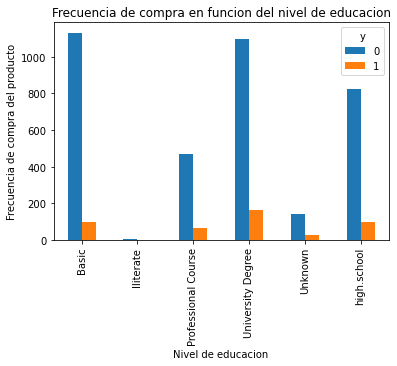

In [13]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

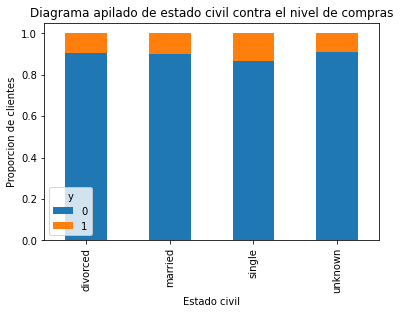

In [14]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

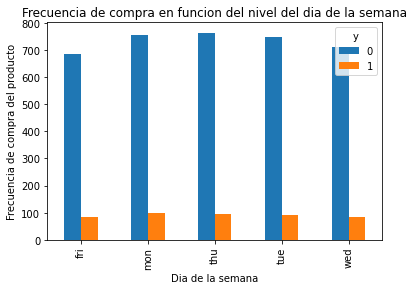

In [15]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

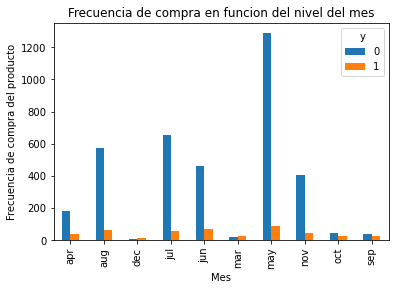

In [16]:
%matplotlib inline
table = pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

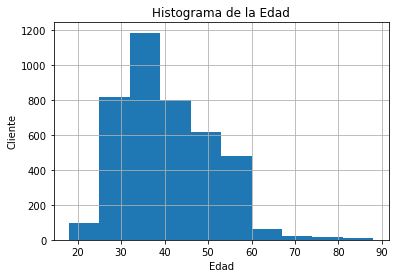

In [17]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<AxesSubplot:xlabel='age'>

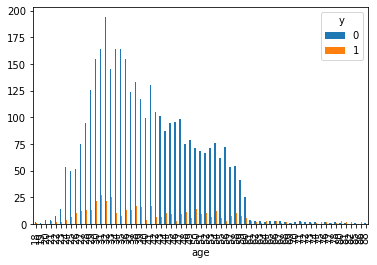

In [18]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

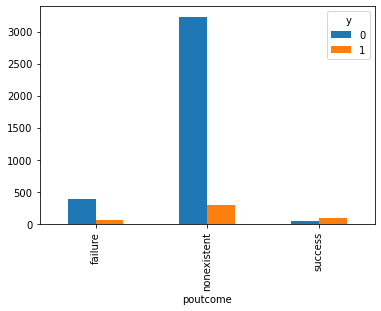

In [19]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversion de las variables categoricas a dummies

In [20]:
categories = ["job","marital",'education','housing','loan','contact','month','day_of_week','poutcome']

print(data)
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new
    

      age         job  marital          education default  housing     loan  \
0      30  BlueCollar  married              Basic      no      yes       no   
1      39    services   single        high.school      no       no       no   
2      25    services  married        high.school      no      yes       no   
3      38    services  married              Basic      no  unknown  unknown   
4      47      admin.  married  University Degree      no      yes       no   
...   ...         ...      ...                ...     ...      ...      ...   
4114   30      admin.  married              Basic      no      yes      yes   
4115   39      admin.  married        high.school      no      yes       no   
4116   27     student   single        high.school      no       no       no   
4117   58      admin.  married        high.school      no       no       no   
4118   34  management   single        high.school      no      yes       no   

        contact month day_of_week  ...  campaign  p

In [21]:
data_vars = data.columns.values.tolist()

In [22]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in data_vars if v not in ["default"]]

In [23]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_BlueCollar',
       'job_admin.', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_Iliterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown',
       'education_high.school', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [24]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Seleccion de rasgos para el modelo

In [25]:
n_features_to_select = 12

In [26]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

ValueError: could not convert string to float: 'BlueCollar'

In [ ]:
bank_data.head()

In [30]:
bank_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,BlueCollar,married,Basic,yes,no,cellular,may,fri,487,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,telephone,may,fri,346,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,unknown,unknown,telephone,jun,fri,17,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,yes,no,cellular,nov,mon,58,...,0,0,0,1,0,0,0,0,1,0
